In [1]:
# Import necessary libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap


In [3]:
## UNET data - finer resolution, spatial Y
ds_1 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Training_data_UNET/full_data.nc', chunks ='auto')


In [3]:
## CNN data - coarse resolution, binary regional Y
ds_2 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/coarse_variable_data_files/train.nc', chunks ='auto')


In [2]:
ds_3 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/coarse_variable_files_new/train.nc')

In [4]:
newcolors = np.vstack((plt.get_cmap('Blues').reversed()(np.linspace(0, 1, 30)),np.ones((10,4)),
                       plt.get_cmap('Reds').reversed()(np.linspace(1, 0, 30))))
double = ListedColormap(newcolors, name='double')

In [63]:
# Y data 
slice_start = np.array([0, 36, 72, 108, 144, -180 ,-144, -108, -72,-36])

slice_end = slice_start + 36
colors = ['red', 'orange','yellow', 'green','blue', 'indigo', 'hotpink', 
      'red', 'orange','yellow', 'green','blue', 'indigo', 'hotpink',
     'red', 'orange','yellow', 'green','blue', 'indigo', 'hotpink',
     'red', 'orange','yellow', 'green','blue', 'indigo', 'hotpink']


basins = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/AIS_basins_Zwally_MERRA2grid.nc').sel(lat = slice(-90,-60)).load()
basins = basins.Zwallybasins > 0

y_data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y_labels_AR_PRECSN_T/*').load()



In [56]:
#define function 
def show_sample(ds_sample):
    num_channels = len(ds_sample.n_channel)
    y_plot_data = y_data.sel(time = ds_sample.time)
    y_plot_data = xr.where(y_plot_data.Y.isin([100, 101, 110, 111, 1100, 1101, 1110, 1111]),1, 0) 
    
    #define figure with 1 row and 5 columns. 
    fig,axes = plt.subplots(5,2,figsize=(25, 12))
    ax = axes.flatten() # Flatten 2x2 array so that you can use ax[0],ax[1],... rather than ax[0],ax[1]...
    fig.suptitle(str(ds_sample.time.values)[0:10]+' '+str(ds_sample.time.values)[11:13], fontsize = 20)
    #set the background to white, for some reason its transparent
    fig.set_facecolor('w')
    #loop over features (inputs)
    for i in range(num_channels):
        #plot images
        cf = ax[i].contourf(ds_sample.lon, ds_sample.lat, np.swapaxes(ds_sample.isel(n_channel = i).values, 0, 1),cmap=double, levels = np.arange(-4,4.5,.5), extend = 'both')
        ax[i].axis('off')
        ax[i].set_title(ds_sample.n_channel[i].values, fontsize = 18)
    cb = plt.colorbar(cf, ax =ax.ravel(),location='top', fraction = .05, shrink = 10,
                      ticks=[-4,-3,-2,-1, 0,1, 2,3,4],pad = .1,extendrect=True, aspect = 25, extend = 'both')

    ax[num_channels].set_title('AR Detection', fontsize = 18)
    for s in range(len(slice_start)):
        slice_data = basins.sel(lon  = slice(slice_start[s], slice_end[s]))
        ax[num_channels].contourf(slice_data.lon, slice_data.lat, slice_data.values ,cmap = ListedColormap(['none', colors[s+2]]))

        ax[num_channels].contourf(slice_data.lon, slice_data.lat, xr.where(slice_data == True, 0, 1) ,cmap = ListedColormap(['none', colors[s]]))

    ax[num_channels].contourf(y_plot_data.lon, y_plot_data.lat, y_plot_data,cmap = ListedColormap(['none', 'black']))



#     plt.savefig('/projects/reba1583/Research3/AntarcticAR_ML/Make_X_data/X_data_example.png', dpi = 300,facecolor = 'white', transparent=True, bbox_inches = 'tight') 


### One Timestep Example: Original Data

In [66]:
y_labels = ds_3.labels_1d.load()

In [74]:
y_labels[125]

<xarray.DataArray 'labels_1d' (categories: 20)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
    time     datetime64[ns] 1980-02-20T18:00:00
Dimensions without coordinates: categories

In [26]:
ds_3.isel(time = 125).load().labels_1d

<xarray.DataArray 'labels_1d' (categories: 20)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
    time     datetime64[ns] 1980-03-26T18:00:00
Dimensions without coordinates: categories

/projects/reba1583/software/anaconda/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


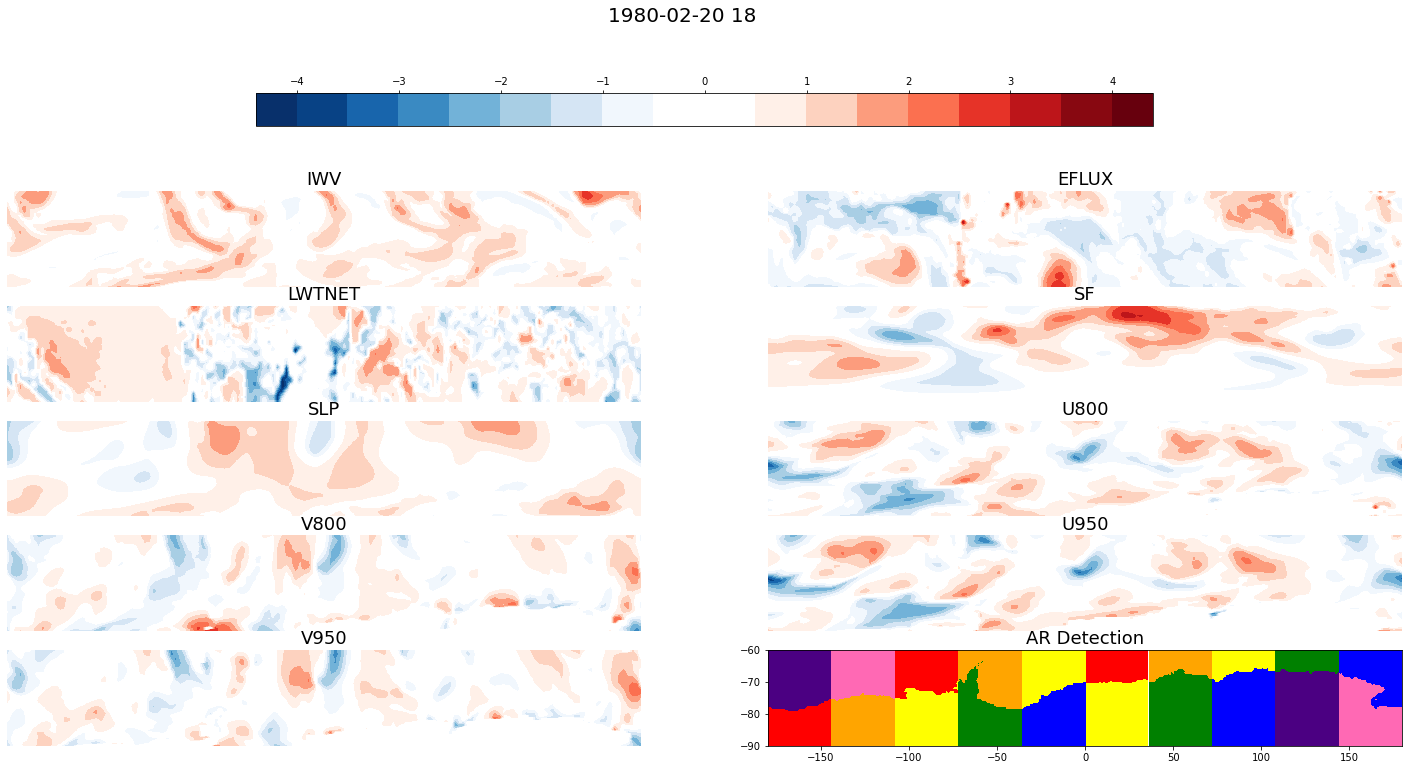

In [75]:
show_sample(ds_3.isel(time = 125).load().features)